In [28]:
#reading data from glass.csv file using pandas read_csv
import pandas as pd
glassKNN=pd.read_csv('glass.csv')
glassKNN=pd.DataFrame(glassKNN)
#inspecting columns and rows of glass dataframe
glassKNN

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [29]:
#Different types of glasses
glassKNN["Type"].drop_duplicates()

0      1
70     2
146    3
163    5
176    6
185    7
Name: Type, dtype: int64

In [30]:
#Storing inputs into X
X = glassKNN.iloc[:,0:9]
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [31]:
#Storing outputs/labels into Y
Y = glassKNN.iloc[:,9:10]
Y

,Type
0,1
1,1
2,1
3,1
4,1
...,...
209,7
210,7
211,7
212,7


In [32]:
#importing KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [33]:
#Searching for opitamal K value
# list of integers 1 to 30
k_range = range(1, 31)

# list of scores from k_range
k_scores = []

# We will loop through reasonable values of k
#Fit the data into model for different k values
#Store accuracy scores in to k_scores
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, Y)
    scores = knn.score(X, Y)
    k_scores.append(scores.mean())

<ipython-input-33-53ea068621a9>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X, Y)
<ipython-input-33-53ea068621a9>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X, Y)
<ipython-input-33-53ea068621a9>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X, Y)
<ipython-input-33-53ea068621a9>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X, Y)
<ipython-input-33-53ea068621a9>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for

Text(0, 0.5, 'Cross-Validated Accuracy')

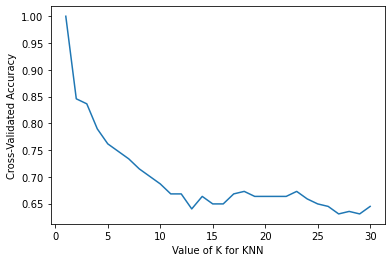

In [34]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
import matplotlib.pyplot as plt
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [35]:
#K=3 or 4 gives considerably valid results. Taking k=3
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, Y)

<ipython-input-35-3ea650a9d517>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh.fit(X, Y)


KNeighborsClassifier(n_neighbors=3)

In [36]:
#Predicting values
print(neigh.predict([[1.8,14.14,0.08,2.88,72.61,0.08,9.18,1.06,0.8]]))

[7]


In [37]:
print(neigh.predict([[1.8,14.14,3.0,2.88,72.61,0.08,9.18,1.06,0.8]]))

[6]


In [38]:
print(neigh.predict([[1.52777,12.64,0.5,0.67,72.02,0.06,14.4,0,0.5]]))

[2]


In [39]:
print(neigh.predict([[1.78,12.64,0,1.65,73.0,0.38,11.53,0,0]]))

[5]
